# Digital Audio Processing 2 -- Descrete Fourier Transform

Date: 2023/09/01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## DFT

$$X(k) = \sum_{n=0}^{N-1} x(n) exp(\frac{-j2 \pi kn}{N}) \qquad (0 \ge k \ge N-1)$$
$$x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k) exp(\frac{j2 \pi kn}{N})  \qquad (0 \ge n \ge N-1)$$

### Expand X(k) usin Euler's formula

$$
X(k) = \sum_{n=0}^{N-1} (x_r(n) + j \, x_i(n)) (cos(\frac{-2 \pi kn}{N}) + j \, sin(\frac{-2 \pi kn}{N}))
$$
$$
= \sum_{n=0}^{N-1} (x_r(n) + j \, x_i(n)) (cos(\frac{2 \pi kn}{N}) - j \, sin(\frac{2 \pi kn}{N}))
$$
$$
= \sum_{n=0}^{N-1} (x_r(n) cos(\frac{2 \pi kn}{N}) + x_i(n) sin(\frac{2 \pi kn}{N}) + 
j \, (x_i(n) \, cos(\frac{2 \pi kn}{N}) - x_r(n) sin(\frac{2 \pi kn}{N}) ) )
$$

In [2]:
# Discrete Fourier Tranform
def dft(x):
    N = len(x)
    x_r = np.real(x)
    x_i = np.imag(x)
    X = np.zeros(N, dtype=np.complex128)
    
    for k in range(N):
        for n in range(N):
            theta = 2 * np.pi * k * n / N
            w_r = np.cos(theta)
            w_i = -np.sin(theta)
            X[k] += complex(w_r * x_r[n] - w_i * x_i[n], w_r * x_i[n] + w_i * x_r[n])
    return X

Text(0.5, 1.0, 'Wave form')

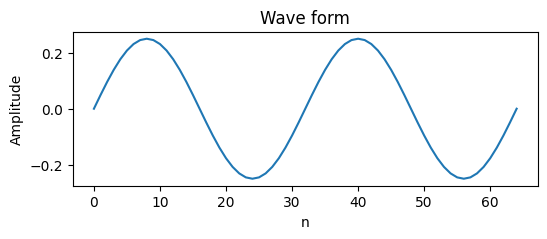

In [3]:
fs = 8000  # 8000Hz
f0 = 250  # 250Hz
N = 64
n = np.arange(64)
x = 0.25 * np.sin(2 * np.pi * f0 * n / fs)

n1 = np.arange(65)  # to draw continuous wave form
x1 = 0.25 * np.sin(2 * np.pi * f0 * n1 / fs)

fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(x1)
ax.set_xlabel('n')
ax.set_ylabel('Amplitude')
ax.set_title('Wave form')

In [4]:
X = dft(x.astype(np.complex128))
AMP = np.abs(X)
THETA = np.angle(X)

ignore = AMP<1*10**-10
AMP[ignore] = 0.
THETA[ignore] = 0.

nonzero = np.nonzero(AMP)
'n: {}, amplitude: {}, theta: {}'.format(nonzero, AMP[nonzero], THETA[nonzero])

'n: (array([ 2, 62]),), amplitude: [8. 8.], theta: [-1.57079633  1.57079633]'

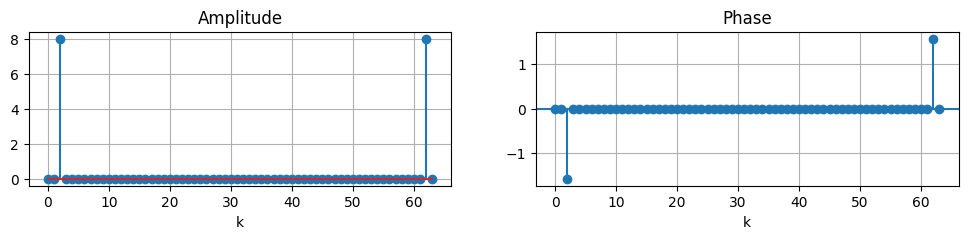

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12,2))

ax0 = axes[0]
ax0.stem(n, AMP)
ax0.set_title('Amplitude')
ax0.set_xlabel('k')
ax0.grid()

ax1 = axes[1]
ax1.stem(n, THETA)
ax1.set_title('Phase')
ax1.set_xlabel('k')
ax1.axhline(0)
ax1.grid()